In [7]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
from numpy.random import seed
import yfinance as yf
seed(0)

In [8]:
def load_stock_prices(ticker, start_date, end_date):
    """
    Load stock prices for a given ticker symbol and date range.

    Parameters:
    - ticker: Stock symbol (e.g., 'AAPL' for Apple Inc.)
    - start_date: Start date in the format 'YYYY-MM-DD'
    - end_date: End date in the format 'YYYY-MM-DD'

    Returns:
    - DataFrame containing stock prices for the specified date range.
    """
    # Define the date range
    start = dt.datetime.strptime(start_date, "%Y-%m-%d")
    end = dt.datetime.strptime(end_date, "%Y-%m-%d")

    # Download historical stock data from Yahoo Finance
    stock_data = yf.download(symbol, start=start_date, end=end_date)

    return stock_data

In [11]:
# Example usage for Amazon (NASDAQ: AMZN)
symbol = 'AAPL'
start_date = '2016-01-01'
end_date = '2024-01-11'

stock_prices = load_stock_prices(symbol, start_date, end_date)
print(stock_prices)



[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-01-04   25.652500   26.342501   25.500000   26.337500   23.977480   
2016-01-05   26.437500   26.462500   25.602501   25.677500   23.376619   
2016-01-06   25.139999   25.592501   24.967501   25.174999   22.919146   
2016-01-07   24.670000   25.032499   24.107500   24.112499   21.951851   
2016-01-08   24.637501   24.777500   24.190001   24.240000   22.067923   
...                ...         ...         ...         ...         ...   
2024-01-04  182.149994  183.089996  180.880005  181.910004  181.910004   
2024-01-05  181.990005  182.759995  180.169998  181.179993  181.179993   
2024-01-08  182.089996  185.600006  181.500000  185.559998  185.559998   
2024-01-09  183.919998  185.149994  182.729996  185.139999  185.139999   
2024-01-10  184.350006  186.399994  183.919998  186.190002  186.190002   

               Volume  
Date         

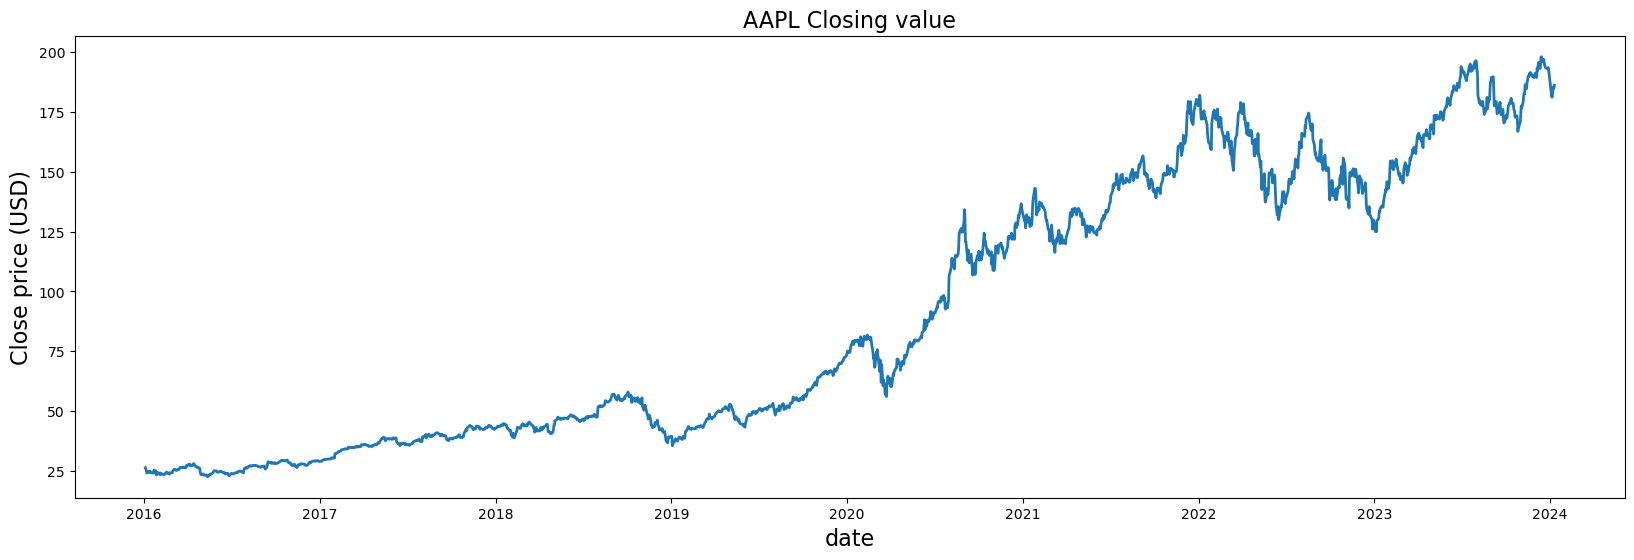

In [13]:
# Plotting Close Value Data
plt.figure(figsize=(20,6))
plt.plot(stock_prices.index, stock_prices['Close'], lw=2)
plt.xlabel("date")
plt.xlabel("date", fontsize=16)
plt.ylabel("Close price (USD)", fontsize=16)
plt.title("AAPL Closing value", fontsize=16);

In [14]:
stock_prices.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

* By converting the Date column to DateTime format, the code allows us to easily manipulate and analyze the dates within the dataframe. 



In [16]:
stock_prices.index = pd.to_datetime(stock_prices.index)

In [17]:
stock_prices.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [20]:
stock_prices.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2023-12-27', '2023-12-28', '2023-12-29', '2024-01-02',
               '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-08',
               '2024-01-09', '2024-01-10'],
              dtype='datetime64[ns]', name='Date', length=2019, freq=None)

* MinMaxScaler is a data transformation technique which will help us to adjust the scale of features in our datasets.

In [21]:
stock_prices

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,23.977480,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.376619,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,22.919146,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,21.951851,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.067923,283192000
...,...,...,...,...,...,...
2024-01-04,182.149994,183.089996,180.880005,181.910004,181.910004,71983600
2024-01-05,181.990005,182.759995,180.169998,181.179993,181.179993,62303300
2024-01-08,182.089996,185.600006,181.500000,185.559998,185.559998,59144500


In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
stock_prices['Close'] = scaler.fit_transform(stock_prices[['Close']])

stock_prices

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,0.021379,23.977480,270597600
2016-01-05,26.437500,26.462500,25.602501,0.017619,23.376619,223164000
2016-01-06,25.139999,25.592501,24.967501,0.014756,22.919146,273829600
2016-01-07,24.670000,25.032499,24.107500,0.008702,21.951851,324377600
2016-01-08,24.637501,24.777500,24.190001,0.009429,22.067923,283192000
...,...,...,...,...,...,...
2024-01-04,182.149994,183.089996,180.880005,0.907705,181.910004,71983600
2024-01-05,181.990005,182.759995,180.169998,0.903546,181.179993,62303300
2024-01-08,182.089996,185.600006,181.500000,0.928500,185.559998,59144500


* # train / test split

In [25]:
train_data = stock_prices.query('Date < "2020-01-01"').reset_index(drop=False)
test_data = stock_prices.query('Date >= "2020-01-01"').reset_index(drop=False)

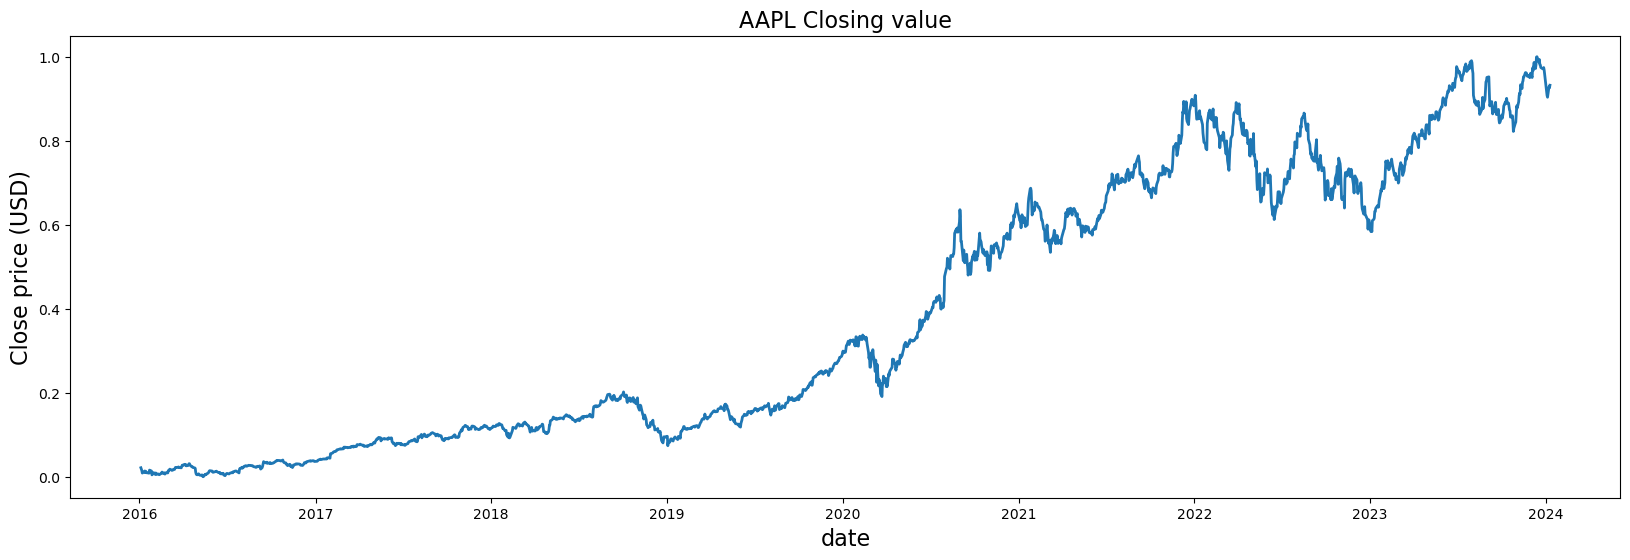

In [26]:
# Plotting Close Value Data
plt.figure(figsize=(20,6))
plt.plot(stock_prices.index, stock_prices['Close'], lw=2)
plt.xlabel("date")
plt.xlabel("date", fontsize=16)
plt.ylabel("Close price (USD)", fontsize=16)
plt.title("AAPL Closing value", fontsize=16);

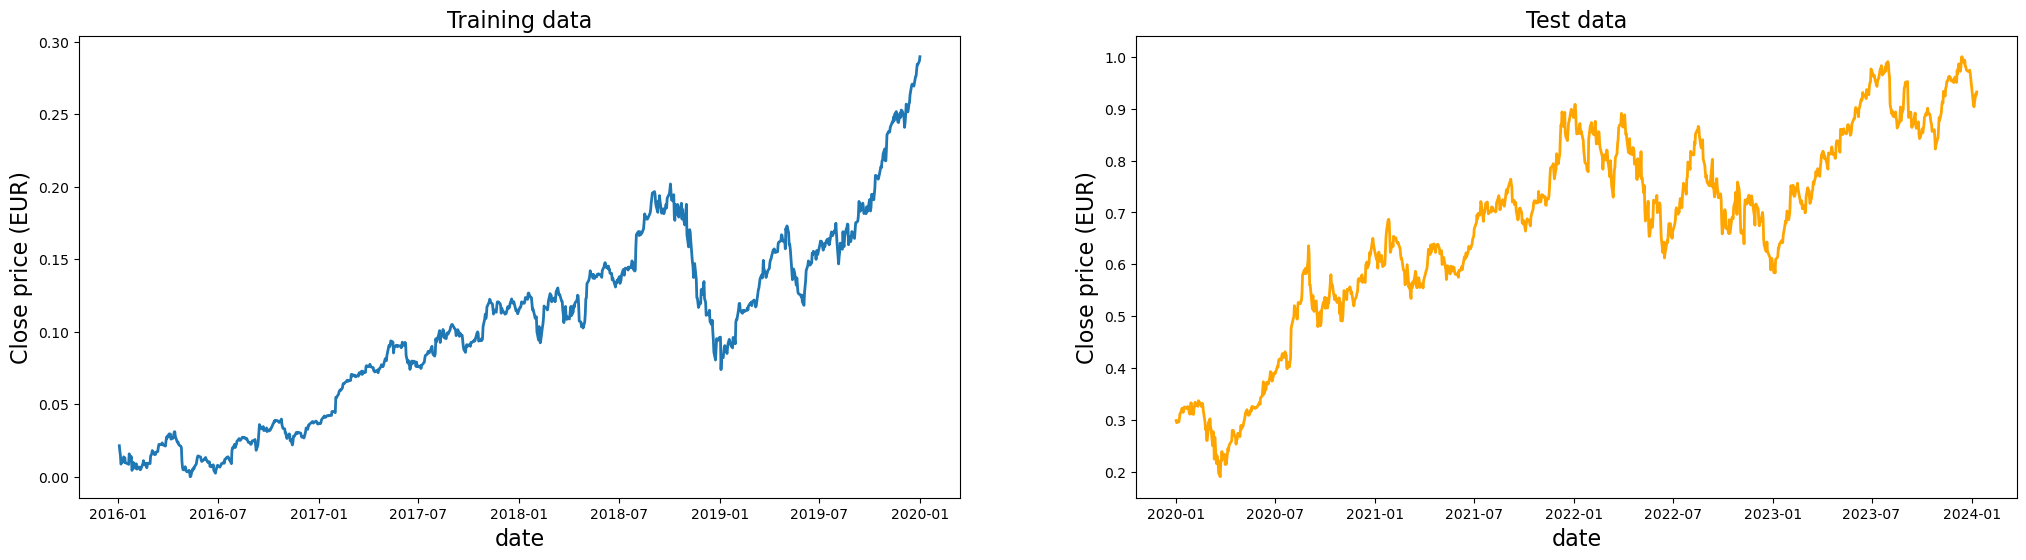

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 6))
ax1.plot(train_data.Date, train_data['Close'], lw=2)
ax1.set_xlabel("date", fontsize=16)
ax1.set_ylabel("Close price (EUR)", fontsize=16)
ax1.set_title("Training data", fontsize=16)
ax2.plot(test_data.Date, test_data['Close'], c='orange', lw=2)
ax2.set_xlabel("date", fontsize=16)
ax2.set_ylabel("Close price (EUR)", fontsize=16)
ax2.set_title("Test data", fontsize=16);

In [28]:
train_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,25.652500,26.342501,25.500000,0.021379,23.977480,270597600
1,2016-01-05,26.437500,26.462500,25.602501,0.017619,23.376619,223164000
2,2016-01-06,25.139999,25.592501,24.967501,0.014756,22.919146,273829600
3,2016-01-07,24.670000,25.032499,24.107500,0.008702,21.951851,324377600
4,2016-01-08,24.637501,24.777500,24.190001,0.009429,22.067923,283192000
...,...,...,...,...,...,...,...
1001,2019-12-24,71.172501,71.222504,70.730003,0.276214,69.236237,48478800
1002,2019-12-26,71.205002,72.495003,71.175003,0.284247,70.609924,93121200
1003,2019-12-27,72.779999,73.492500,72.029999,0.284091,70.583115,146266000
1004,2019-12-30,72.364998,73.172501,71.305000,0.286540,71.002029,144114400


In [29]:
test_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,0.299117,73.152664,135480400
1,2020-01-03,74.287498,75.144997,74.125000,0.294958,72.441452,146322800
2,2020-01-06,73.447502,74.989998,73.187500,0.298334,73.018684,118387200
3,2020-01-07,74.959999,75.224998,74.370003,0.296325,72.675293,108872000
4,2020-01-08,74.290001,76.110001,74.290001,0.303162,73.844360,132079200
...,...,...,...,...,...,...,...
1008,2024-01-04,182.149994,183.089996,180.880005,0.907705,181.910004,71983600
1009,2024-01-05,181.990005,182.759995,180.169998,0.903546,181.179993,62303300
1010,2024-01-08,182.089996,185.600006,181.500000,0.928500,185.559998,59144500
1011,2024-01-09,183.919998,185.149994,182.729996,0.926107,185.139999,42841800
